In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import ssqueezepy as ssq

from paths import paths

In [78]:
from ssqueezepy import ssq_cwt

def viz(Tx):
    plt.imshow(np.abs(Tx), aspect='auto', vmin=0, vmax=.2, cmap='turbo')
    plt.ylim(0, 180)
    plt.show()

0 Fp1
1 F3
2 C3
3 P3
4 F7
5 T3
6 T5
7 O1
8 Fz
9 Cz
10 Pz
11 Fp2
12 F4
13 C4
14 P4
15 F8
16 T4
17 T6
18 O2
19 EKG


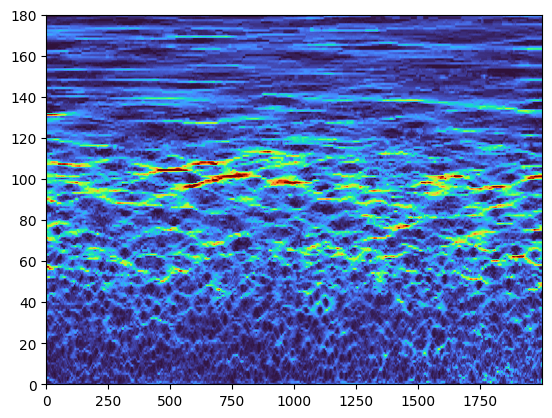

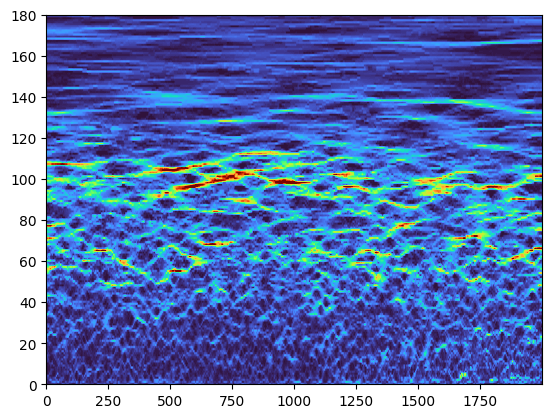

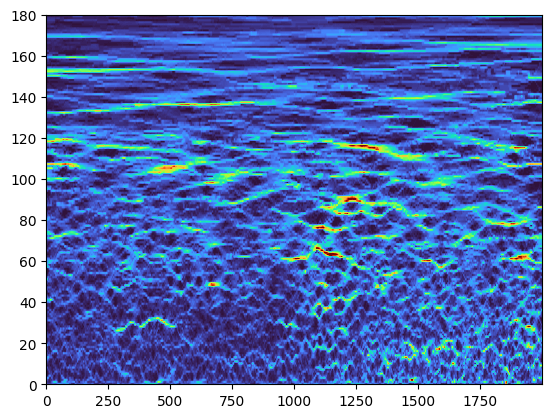

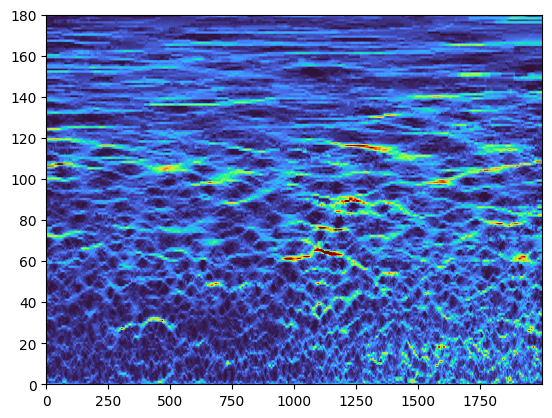

In [80]:
#eeg = pd.read_parquet(paths.TRAIN_EEGS + '351917269.parquet').to_numpy()
eeg = np.load(paths.TRAIN_CLEAN_5 + '1628180742.npy')
#eeg = np.load(paths.TRAIN_CLEAN_5 + '351917269.npy')

FEATS2IDX = {paths.EEG_LABELS[idx] : idx for idx in range(20)}

for i in range(20): print(i, paths.EEG_LABELS[i])

wavelet = ssq.wavelets.Wavelet(('morlet', {'mu': 20}))

list_tuples = [[(0,4), (4,5), (5,6), (6,7)],
               [(0,1), (1,2), (2,3), (3,7)],
               [(11,12), (12,13), (13,14), (14,18)],
               [(11,15), (15,16), (16,17), (17,18)]]

for tuples in list_tuples:
    Twxos = []
    for tup in tuples:
        xo = eeg[:2000,tup[0]] - eeg[:2000,tup[1]]
        Twxo, *_ = ssq_cwt(xo, wavelet)
        Twxos.append(Twxo)
    viz(np.mean(Twxos, axis=0))